In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
#dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
#Under-Sampling
#Build a sample dataset containing similar distribution of normal transactions and Fraudulent transactions
legit_sample=legit.sample(n=492)

In [13]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194934,130829.0,-2.267393,0.300942,-0.936957,-1.951102,1.554826,-0.759188,0.561178,-1.305513,-1.477278,...,1.135149,0.929634,-0.885747,0.285505,1.538554,0.432600,-0.827958,0.619272,10.00,0
30910,36135.0,-1.328513,1.695471,1.170824,3.063501,-0.036084,0.768347,-0.502803,1.081779,-2.262343,...,0.276831,0.523183,-0.327204,-0.257275,0.131594,0.478137,-0.232078,-0.119420,0.00,0
160518,113430.0,-1.143038,1.065658,-1.452082,-0.567437,0.541172,-0.560357,0.227510,0.720586,-0.378465,...,0.400723,1.208498,-0.283745,-0.972537,-0.605718,-0.169520,0.467204,0.100930,49.99,0
128858,78866.0,1.169428,0.111040,-0.256641,0.396875,0.222658,-0.452408,0.419992,-0.174336,-0.187207,...,-0.355500,-1.141970,0.058694,-0.456571,0.270208,0.194442,-0.057718,0.010890,62.95,0
16338,27728.0,1.295257,0.400235,-1.832616,0.133846,2.551452,3.060135,-0.285335,0.756222,-0.209661,...,-0.105513,-0.385454,-0.154808,0.881591,0.849888,-0.311819,0.034099,0.044344,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194934,130829.0,-2.267393,0.300942,-0.936957,-1.951102,1.554826,-0.759188,0.561178,-1.305513,-1.477278,...,1.135149,0.929634,-0.885747,0.285505,1.538554,0.432600,-0.827958,0.619272,10.00,0
30910,36135.0,-1.328513,1.695471,1.170824,3.063501,-0.036084,0.768347,-0.502803,1.081779,-2.262343,...,0.276831,0.523183,-0.327204,-0.257275,0.131594,0.478137,-0.232078,-0.119420,0.00,0
160518,113430.0,-1.143038,1.065658,-1.452082,-0.567437,0.541172,-0.560357,0.227510,0.720586,-0.378465,...,0.400723,1.208498,-0.283745,-0.972537,-0.605718,-0.169520,0.467204,0.100930,49.99,0
128858,78866.0,1.169428,0.111040,-0.256641,0.396875,0.222658,-0.452408,0.419992,-0.174336,-0.187207,...,-0.355500,-1.141970,0.058694,-0.456571,0.270208,0.194442,-0.057718,0.010890,62.95,0
16338,27728.0,1.295257,0.400235,-1.832616,0.133846,2.551452,3.060135,-0.285335,0.756222,-0.209661,...,-0.105513,-0.385454,-0.154808,0.881591,0.849888,-0.311819,0.034099,0.044344,1.00,0


In [15]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [16]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93961.936992,-0.154053,-0.039285,0.004470,-0.112576,-0.012535,0.166975,-0.098229,0.049578,-0.027872,...,0.019427,0.088911,0.025978,0.032425,-0.005043,0.003221,0.011648,0.033084,-0.000550,92.496341
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [18]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
194934  130829.0 -2.267393  0.300942 -0.936957 -1.951102  1.554826 -0.759188   
30910    36135.0 -1.328513  1.695471  1.170824  3.063501 -0.036084  0.768347   
160518  113430.0 -1.143038  1.065658 -1.452082 -0.567437  0.541172 -0.560357   
128858   78866.0  1.169428  0.111040 -0.256641  0.396875  0.222658 -0.452408   
16338    27728.0  1.295257  0.400235 -1.832616  0.133846  2.551452  3.060135   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [19]:
print(Y)

194934    0
30910     0
160518    0
128858    0
16338     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


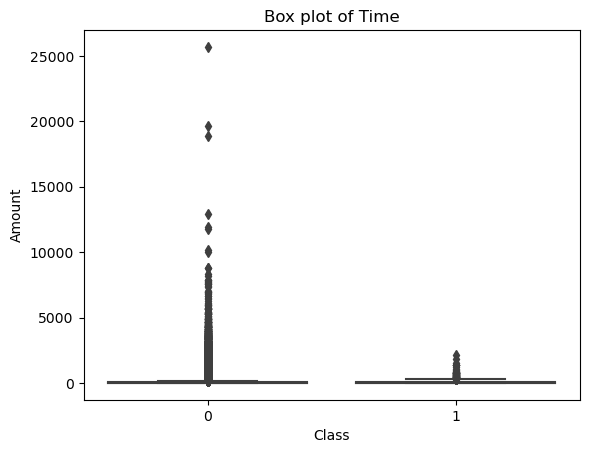

In [22]:
#Data Visualization
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Box plot of Time')
plt.show()

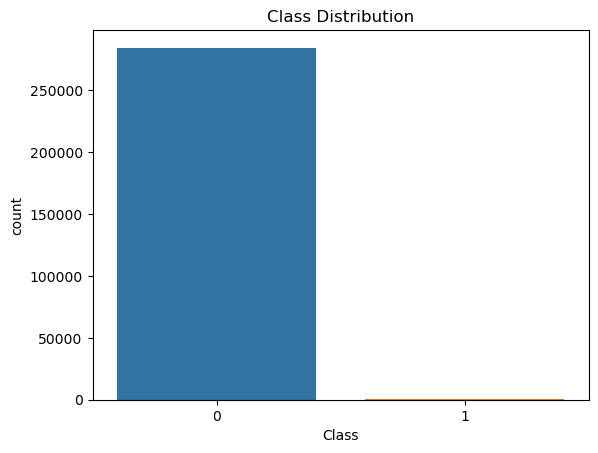

In [23]:
sns.countplot(data=df,x='Class')
plt.title('Class Distribution')
plt.show()

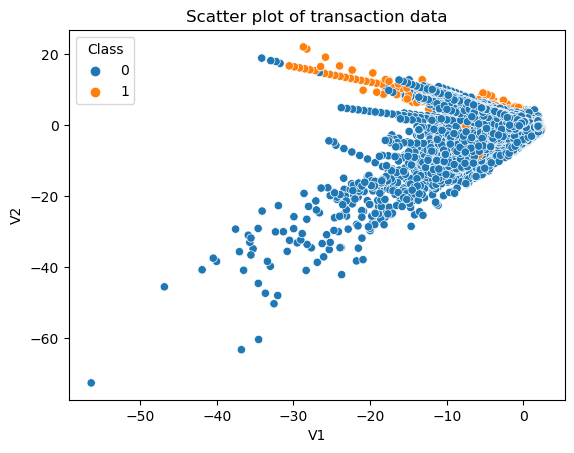

In [24]:
sns.scatterplot(x='V1',y='V2',data=df,hue='Class')
plt.title("Scatter plot of transaction data")
plt.show()

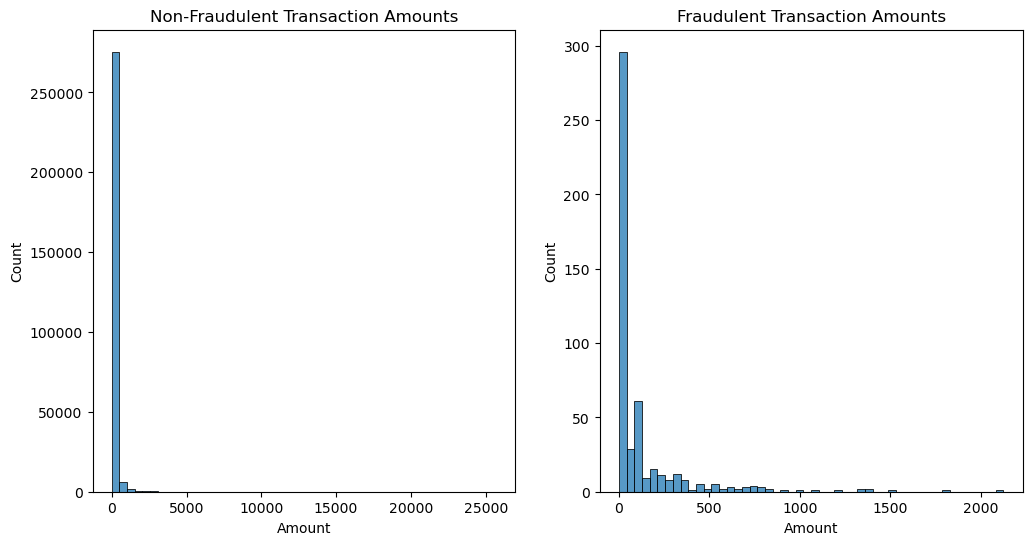

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50)
plt.title('Non-Fraudulent Transaction Amounts')
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50)
plt.title('Fraudulent Transaction Amounts')
plt.show()

In [26]:
#Model Training
#Logistic Regression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [27]:
#Accuracy Score
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.9542566709021602


In [28]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on testing data:',test_data_accuracy)

Accuracy on testing data: 0.934010152284264


In [30]:
classify=classification_report(X_test_prediction,Y_test)
print(classify)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       102
           1       0.92      0.95      0.93        95

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



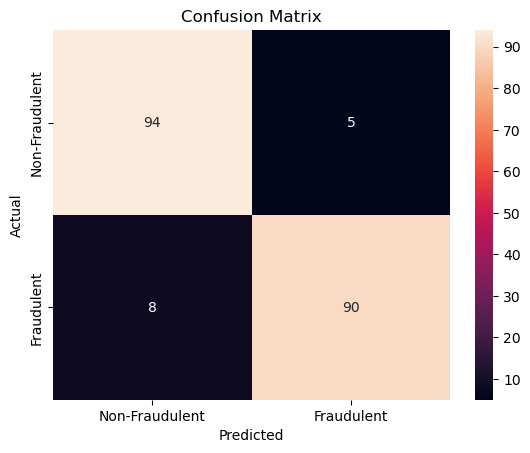

In [33]:
cm=confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(cm,annot=True,xticklabels=["Non-Fraudulent","Fraudulent"],yticklabels=["Non-Fraudulent","Fraudulent"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()